# <font color="#CF4447">Unraveling the Mysteries of the Female Brain: Sex Patterns in ADHD</font>

## Steps Followed
Following steps are performed to successfully completing this assignment:
1. Data Preparation
2. Data Cleaning
3. Train Validation Split 70-30
4. EDA on Training Data
5. EDA on Validation Data (optional)
6. Feature Engineering
7. Model Building
8. Predicting and Model Evaluation

In [20]:
# importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from category_encoders import TargetEncoder

## <span style="color:Green"> 1.0 Featching Datasets 📖</span> 

### 1.1 Training Data

In [22]:
data_quant=pd.read_excel("TRAIN_QUANTITATIVE_METADATA_new.xlsx")
data_cat=pd.read_excel("TRAIN_CATEGORICAL_METADATA_new.xlsx")
data_FMRI= pd.read_csv("TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
data_sol = pd.read_excel('TRAINING_SOLUTIONS.xlsx')

### 1.2 Test Data

In [24]:
Test_quant=pd.read_excel("TEST_QUANTITATIVE_METADATA.xlsx")
Test_cat=pd.read_excel("TEST_CATEGORICAL.xlsx")
Test_FMRI= pd.read_csv("TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")

## <span style="color:Green"> 2.0 Understanding Data 🔍 and Data Cleaning 🧹</span>

### 2.1.0 Training Data

#### 2.1.1 Analysing features, datatype and shape

In [26]:
#Training Data
quant_data_rows, quant_data_columns = data_quant.shape
cat_data_rows, cat_data_columns = data_cat.shape
fMRI_data_rows, fMRI_data_columns = data_FMRI.shape
sol_data_rows, sol_data_columns = data_sol.shape

#Test Data
test_quant_data_rows, test_quant_data_columns = Test_quant.shape
test_cat_data_rows, test_cat_data_columns =Test_cat.shape
test_fMRI_data_rows, test_fMRI_data_columns = Test_FMRI.shape

print("Training Data")
print("*"*20)
print("No. of rows in qunat data:",quant_data_rows)
print("No. of Columns in qunat data:",quant_data_columns)
print("_"*20)
print("No. of rows in Categpricalt data:",cat_data_rows)
print("No. of Columns in Categorical data:",cat_data_columns)
print("_"*20)
print("No. of rows in fMRI data:",fMRI_data_rows)
print("No. of Columns in fMRI data:",fMRI_data_columns)
print("_"*20)
print("No. of rows in Solution data:",sol_data_rows)
print("No. of Columns in Solution data:",sol_data_columns)
print("\n")
print("Test Data")
print("*"*20)
print("No. of rows in qunat data:",test_quant_data_rows)
print("No. of Columns in qunat data:",test_quant_data_columns)
print("_"*20)
print("No. of rows in Categpricalt data:",test_cat_data_rows)
print("No. of Columns in Categorical data:",test_cat_data_columns)
print("_"*20)
print("No. of rows in fMRI data:",test_fMRI_data_rows)
print("No. of Columns in fMRI data:",test_fMRI_data_columns)

Training Data
********************
No. of rows in qunat data: 1213
No. of Columns in qunat data: 19
____________________
No. of rows in Categpricalt data: 1213
No. of Columns in Categorical data: 10
____________________
No. of rows in fMRI data: 1213
No. of Columns in fMRI data: 19901
____________________
No. of rows in Solution data: 1213
No. of Columns in Solution data: 3


Test Data
********************
No. of rows in qunat data: 304
No. of Columns in qunat data: 19
____________________
No. of rows in Categpricalt data: 304
No. of Columns in Categorical data: 10
____________________
No. of rows in fMRI data: 304
No. of Columns in fMRI data: 19901


### Remapping classes of Categorical Variable

In [28]:
# Define the mappings for each categorical feature
mappings = {
    'Basic_Demos_Study_Site': {
        1: 'Staten Island',
        2: 'MRV',
        3: 'Midtown',
        4: 'Harlem',
        5: 'SI RUMC'
    },
    'PreInt_Demos_Fam_Child_Ethnicity': {
        0: 'Not Hispanic or Latino',
        1: 'Hispanic or Latino',
        2: 'Decline to specify',
        3: 'Unknown'
    },
    'PreInt_Demos_Fam_Child_Race': {
        0: 'White/Caucasian',
        1: 'Black/African American',
        2: 'Hispanic',
        3: 'Asian',
        4: 'Indian',
        5: 'Native American Indian',
        6: 'American Indian/Alaskan Native',
        7: 'Native Hawaiian/Other Pacific Islander',
        8: 'Two or more races',
        9: 'Other race',
        10: 'Unknown',
        11: 'Choose not to specify'
    },
    'MRI_Track_Scan_Location': {
        1: 'Staten Island',
        2: 'RUBIC',
        3: 'CBIC',
        4: 'CUNY'
    },
    'Barratt_Barratt_P1_Edu': {
        3: 'Less than 7th grade',
        6: 'Junior high/Middle school (9th grade)',
        9: 'Partial high school (10th or 11th grade)',
        12: 'High school graduate',
        15: 'Partial college (at least one year)',
        18: 'College education',
        21: 'Graduate degree'
    },
    'Barratt_Barratt_P1_Occ': {
        0: 'Homemaker, stay at home parent.',
        5: 'Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.',
        10: 'Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.',
        15: 'Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.',
        20: 'Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.',
        25: 'Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.',
        30: 'Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.',
        35: 'Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.',
        40: 'Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.',
        45: 'Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant.'
    },
    'Barratt_Barratt_P2_Edu': {
        3: 'Less than 7th grade',
        6: 'Junior high/Middle school (9th grade)',
        9: 'Partial high school (10th or 11th grade)',
        12: 'High school graduate',
        15: 'Partial college (at least one year)',
        18: 'College education',
        21: 'Graduate degree'
    },
    'Barratt_Barratt_P2_Occ': {
        0: 'Homemaker, stay at home parent.',
        5: 'Day laborer, janitor, house cleaner, farm worker, food counter sales, food preparation worker, busboy.',
        10: 'Garbage collector, short-order cook, cab driver, shoe sales, assembly line workers, masons, baggage porter.',
        15: 'Painter, skilled construction trade, sales clerk, truck driver, cook, sales counter or general office clerk.',
        20: 'Automobile mechanic, typist, locksmith, farmer, carpenter, receptionist, construction laborer, hairdresser.',
        25: 'Machinist, musician, bookkeeper, secretary, insurance sales, cabinet maker, personnel specialist, welder.',
        30: 'Supervisor, librarian, aircraft mechanic, artist and artisan, electrician, administrator, military enlisted personnel, buyer.',
        35: 'Nurse, skilled technician, medical technician, counselor, manager, police and fire personnel, financial manager, physical, occupational, speech therapist.',
        40: 'Mechanical, nuclear, and electrical engineer, educational administrator, veterinarian, military officer, elementary, high school and special education teacher.',
        45: 'Physician, attorney, professor, chemical and aerospace engineer, judge, CEO, senior manager, public official, psychologist, pharmacist, accountant.'
    }
}

# Replace integer values with string mappings
for column, mapping in mappings.items():
    if column in data_cat.columns:  # Ensure the column exists in the DataFrame
        data_cat[column] = data_cat[column].replace(mapping)

# Confirm the replacement
data_cat.head()

participant_id  Basic_Demos_Enroll_Year Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                 Harlem   
1   00fV0OyyoLfw                     2017          Staten Island   
2   04X1eiS79T4B                     2017          Staten Island   
3   05ocQutkURd6                     2018          Staten Island   
4   06YUNBA9ZRLq                     2018          Staten Island   

  PreInt_Demos_Fam_Child_Ethnicity PreInt_Demos_Fam_Child_Race  \
0               Hispanic or Latino             White/Caucasian   
1           Not Hispanic or Latino                  Other race   
2               Hispanic or Latino                    Hispanic   
3                          Unknown           Two or more races   
4           Not Hispanic or Latino      Black/African American   

  MRI_Track_Scan_Location                    Barratt_Barratt_P1_Edu  \
0                    CBIC                           Graduate degree   
1                   RUBIC                           Graduate degree   
2                   RUBIC  Partial high school (10th or 11th grade)   
3                   RUBIC                         College education   
4                   RUBIC                      High school graduate   

                              Barratt_Barratt_P1_Occ Barratt_Barratt_P2_Edu  \
0  Physician, attorney, professor, chemical and a...                    NaN   
1                    Homemaker, stay at home parent.        Graduate degree   
2                    Homemaker, stay at home parent.                    NaN   
3  Garbage collector, short-order cook, cab drive...      College education   
4                    Homemaker, stay at home parent.                    NaN   

                              Barratt_Barratt_P2_Occ  
0                                                NaN  
1  Physician, attorney, professor, chemical and a...  
2                                                NaN  
3                    Homemaker, stay at home parent.  
4                                                NaN

#### 2.1.2 Missing Values

##### 2.1.2.1 Finding missing values-Numeric Variables

In [30]:
train_cols = round(100*data_quant.isnull().mean(),2)
test_cols= round(100*Test_quant.isnull().mean(),2)


# Check if train and test datasets have the same columns
if list(train_cols.index) == list(test_cols.index):
    # Combine results into a DataFrame if columns match
    missing_df = pd.DataFrame({
        'Column': train_cols.index,
        'Missing % (Train)': train_cols.values,
        'Missing % (Test)': test_cols.values
    })
    print(missing_df)
else:
    print("Train & Test have different columns")

                        Column  Missing % (Train)  Missing % (Test)
0               participant_id               0.00              0.00
1                EHQ_EHQ_Total               1.07              0.33
2         ColorVision_CV_Score               1.90              2.96
3               APQ_P_APQ_P_CP               0.99              4.93
4               APQ_P_APQ_P_ID               0.99              4.93
5              APQ_P_APQ_P_INV               0.99              4.93
6              APQ_P_APQ_P_OPD               0.99              4.93
7               APQ_P_APQ_P_PM               0.99              4.93
8               APQ_P_APQ_P_PP               0.99              4.93
9     SDQ_SDQ_Conduct_Problems               0.74              9.87
10  SDQ_SDQ_Difficulties_Total               0.74              9.87
11  SDQ_SDQ_Emotional_Problems               0.74              9.87
12       SDQ_SDQ_Externalizing               0.74              9.87
13   SDQ_SDQ_Generating_Impact               0.7

##### 2.1.2.3 Finding missing values-Categorical Variables

In [32]:
train_cols = round(100*data_cat.isnull().mean(),2)
test_cols= round(100*Test_cat.isnull().mean(),2)


# Check if train and test datasets have the same columns
if list(train_cols.index) == list(test_cols.index):
    # Combine results into a DataFrame if columns match
    missing_df = pd.DataFrame({
        'Column': train_cols.index,
        'Missing % (Train)': train_cols.values,
        'Missing % (Test)': test_cols.values
    })
    print(missing_df)
else:
    print("Train & Test have different columns")

                             Column  Missing % (Train)  Missing % (Test)
0                    participant_id               0.00              0.00
1           Basic_Demos_Enroll_Year               0.00              0.00
2            Basic_Demos_Study_Site               0.00              0.00
3  PreInt_Demos_Fam_Child_Ethnicity               3.54              0.99
4       PreInt_Demos_Fam_Child_Race               4.45              1.97
5           MRI_Track_Scan_Location               0.25              0.00
6            Barratt_Barratt_P1_Edu               1.24              0.33
7            Barratt_Barratt_P1_Occ               2.56              0.33
8            Barratt_Barratt_P2_Edu              16.32             11.84
9            Barratt_Barratt_P2_Occ              18.30             13.82


##### 2.1.2.5 Finding missing values in FMRI dataset-numerical Variables

In [34]:
missing_percentage_train = round(100 * data_FMRI.isnull().mean(), 2)
missing_percentage_test = round(100 * Test_FMRI.isnull().mean(), 2)

# Check for missing values-train
if missing_percentage_train.sum() == 0:  # If all percentages are 0
    print("No missing value found in training data")
else:
    for col, percentage in missing_percentage_train.items():
        if percentage > 0:
            print(f"Column: {col}, Missing Percentage: {percentage}")    

# Check for missing values-test
if missing_percentage_test.sum() == 0:  # If all percentages are 0
    print("No missing value found in test data")
else:
    for col, percentage in missing_percentage_test.items():
        if percentage > 0:
            print(f"Column: {col}, Missing Percentage: {percentage}") 

No missing value found in training data
No missing value found in test data


### 2.1.2.2 Handling missing values-Numeric Variables

In [36]:
# Numerical columns
num_cols = ['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID',
            'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
            'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
            'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
            'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']

# Add missingness indicator before imputation
data_quant['MRI_Track_Age_at_Scan_Missing'] = data_quant['MRI_Track_Age_at_Scan'].isna().astype(int)
Test_quant['MRI_Track_Age_at_Scan_Missing'] = Test_quant['MRI_Track_Age_at_Scan'].isna().astype(int)


"""
It estimates and fills in missing data by leveraging the similarity between data points, using the K-Nearest Neighbors algorithm.
How KNN Imputation Works

Identify Missing Values: First, locate the missing values (often marked as NaN) in the dataset.

Find Nearest Neighbors: For each data point with a missing value, the algorithm finds the k-nearest neighbors based on a chosen distance metric (commonly Euclidean distance).

Impute Missing Values: The missing value is replaced with the mean (or median) of the corresponding feature values from its k-nearest neighbors. 
Optionally, neighbors can be weighted by their distance, giving closer points more influence.
"""

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
data_quant[num_cols] = imputer.fit_transform(data_quant[num_cols]) #training
Test_quant[num_cols] = imputer.transform(Test_quant[num_cols]) #test


##### 2.1.2.4 Handling missing values-Categorical Variables

In [38]:
# Add missingness indicators for high-missing features-train
for col in ['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']:
    data_cat[f'{col}_Missing'] = data_cat[col].isna().astype(int)

for cols in data_cat.columns:  # Iterate through each categorical column
    data_cat[cols] = data_cat[cols].fillna(data_cat[cols].mode()[0])

# Add missingness indicators for high-missing features-test
for col in ['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']:
    Test_cat[f'{col}_Missing'] = Test_cat[col].isna().astype(int)

for cols in Test_cat.columns:  # Iterate through each categorical column
    Test_cat[cols] = Test_cat[cols].fillna(Test_cat[cols].mode()[0])


In [40]:
# reveifying the missing count after imputation- Numeric

train_cols = round(100*data_quant.isnull().mean(),2)
test_cols= round(100*Test_quant.isnull().mean(),2)


# Check if train and test datasets have the same columns
if list(train_cols.index) == list(test_cols.index):
    # Combine results into a DataFrame if columns match
    missing_df = pd.DataFrame({
        'Column': train_cols.index,
        'Missing % (Train)': train_cols.values,
        'Missing % (Test)': test_cols.values
    })
    print(missing_df)
else:
    print("Train & Test have different columns")

                           Column  Missing % (Train)  Missing % (Test)
0                  participant_id                0.0               0.0
1                   EHQ_EHQ_Total                0.0               0.0
2            ColorVision_CV_Score                0.0               0.0
3                  APQ_P_APQ_P_CP                0.0               0.0
4                  APQ_P_APQ_P_ID                0.0               0.0
5                 APQ_P_APQ_P_INV                0.0               0.0
6                 APQ_P_APQ_P_OPD                0.0               0.0
7                  APQ_P_APQ_P_PM                0.0               0.0
8                  APQ_P_APQ_P_PP                0.0               0.0
9        SDQ_SDQ_Conduct_Problems                0.0               0.0
10     SDQ_SDQ_Difficulties_Total                0.0               0.0
11     SDQ_SDQ_Emotional_Problems                0.0               0.0
12          SDQ_SDQ_Externalizing                0.0               0.0
13    

In [42]:
# reveifying the missing count after imputation- Categorical
train_cols = round(100*data_cat.isnull().mean(),2)
test_cols= round(100*Test_cat.isnull().mean(),2)


# Check if train and test datasets have the same columns
if list(train_cols.index) == list(test_cols.index):
    # Combine results into a DataFrame if columns match
    missing_df = pd.DataFrame({
        'Column': train_cols.index,
        'Missing % (Train)': train_cols.values,
        'Missing % (Test)': test_cols.values
    })
    print(missing_df)
else:
    print("Train & Test have different columns")

                              Column  Missing % (Train)  Missing % (Test)
0                     participant_id                0.0               0.0
1            Basic_Demos_Enroll_Year                0.0               0.0
2             Basic_Demos_Study_Site                0.0               0.0
3   PreInt_Demos_Fam_Child_Ethnicity                0.0               0.0
4        PreInt_Demos_Fam_Child_Race                0.0               0.0
5            MRI_Track_Scan_Location                0.0               0.0
6             Barratt_Barratt_P1_Edu                0.0               0.0
7             Barratt_Barratt_P1_Occ                0.0               0.0
8             Barratt_Barratt_P2_Edu                0.0               0.0
9             Barratt_Barratt_P2_Occ                0.0               0.0
10    Barratt_Barratt_P2_Edu_Missing                0.0               0.0
11    Barratt_Barratt_P2_Occ_Missing                0.0               0.0


## <span style="color:Green"> 3.0 Data Preprocessing ⚙️</span> 

### 3.1 Merging training dataset

In [44]:
data_merged_0 = pd.merge(data_quant,data_cat, on="participant_id", how="left")
data_merged_0.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan', 'MRI_Track_Age_at_Scan_Missing',
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu_Missing',
       'Barratt_Barratt_P2_Occ_Missing'],
      dtype='object')

In [46]:
data_merged_1 = pd.merge(data_merged_0,data_FMRI, on="participant_id", how="left")
data_merged_1.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19931)

In [48]:
data_merged = pd.merge(data_merged_1,data_sol,on="participant_id", how="left")
data_merged.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_198thcolumn', '195throw_199thcolumn', '196throw_197thcolumn',
       '196throw_198thcolumn', '196throw_199thcolumn', '197throw_198thcolumn',
       '197throw_199thcolumn', '198throw_199thcolumn', 'ADHD_Outcome',
       'Sex_F'],
      dtype='object', length=19933)

In [267]:
# final check for missing values after merging all the datasets
missing_percentage=round(100*data_merged.isnull().mean(),2)

# Check for missing values
if missing_percentage.sum() == 0:  # If all percentages are 0
    print("No missing value found in training data")
else:
    for col, percentage in missing_percentage.items():
        if percentage > 0:
            print(f"Column: {col}, Missing Percentage: {percentage}") 
print("Rows and Columns:",data_merged.shape)

No missing value found in training data
Rows and Columns: (1213, 19933)


### 3.2 Merging Test dataset

In [52]:
Test_merged_0 = pd.merge(Test_quant, Test_cat, how='left', on='participant_id')
Test_merged_0.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan', 'MRI_Track_Age_at_Scan_Missing',
       'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Barratt_Barratt_P2_Edu_Missing',
       'Barratt_Barratt_P2_Occ_Missing'],
      dtype='object')

In [54]:
Test_merged = pd.merge(Test_merged_0, Test_FMRI,how='left', on='participant_id')
Test_merged.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19931)

In [271]:
# final check for missing values after merging all the datasets
missing_percentage=round(100*Test_merged.isnull().mean(),2)

# Check for missing values
if missing_percentage.sum() == 0:  # If all percentages are 0
    print("No missing value found in test data")
else:
    for col, percentage in missing_percentage.items():
        if percentage > 0:
            print(f"Column: {col}, Missing Percentage: {percentage}") 
print("Rows and Columns:",Test_merged.shape)

No missing value found in test data
Rows and Columns: (304, 19931)


### 3.3 Checking Imbalance

ADHD_Outcome
1    0.685078
0    0.314922
Name: proportion, dtype: float64


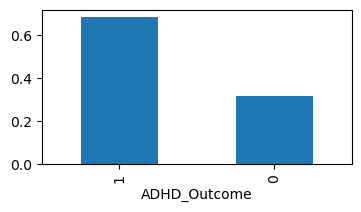

In [62]:
# ADHD_outcome
plt.figure(figsize=(4,2))
print(data_merged['ADHD_Outcome'].value_counts(normalize=True))
data_merged['ADHD_Outcome'].value_counts(normalize=True).plot.bar()
plt.show()

Sex_F
0    0.657049
1    0.342951
Name: proportion, dtype: float64


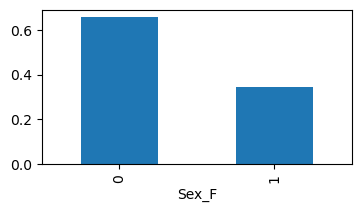

In [64]:
# Gender
plt.figure(figsize=(4,2))
print(data_merged['Sex_F'].value_counts(normalize=True))
data_merged['Sex_F'].value_counts(normalize=True).plot.bar()
plt.show()

### 3.4 Dropping columns with less differentiating power

In [66]:
data_mergerd_0 = data_merged.drop('participant_id',axis=1)
Test_merged_0 = Test_merged.drop('participant_id',axis=1)

### 3.5 Spliting train dataset

In [68]:
X = data_mergerd_0.drop(['ADHD_Outcome','Sex_F'], axis=1)
y = data_mergerd_0[['ADHD_Outcome','Sex_F']]
X.shape, y.shape

((1213, 19930), (1213, 2))

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)
#Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (970, 19930)
X_test shape: (243, 19930)
y_train shape: (970, 2)
y_test shape: (243, 2)


## EDA-Training Data

In [273]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 855 to 1090
Columns: 19930 entries, EHQ_EHQ_Total to 198throw_199thcolumn
dtypes: float64(19918), int32(3), int64(1), object(8)
memory usage: 147.5+ MB


In [97]:
quant_cols = [
    "EHQ_EHQ_Total",
    "ColorVision_CV_Score",
    "APQ_P_APQ_P_CP",
    "APQ_P_APQ_P_ID",
    "APQ_P_APQ_P_INV",
    "APQ_P_APQ_P_OPD",
    "APQ_P_APQ_P_PM",
    "APQ_P_APQ_P_PP",
    "SDQ_SDQ_Conduct_Problems",
    "SDQ_SDQ_Difficulties_Total",
    "SDQ_SDQ_Emotional_Problems",
    "SDQ_SDQ_Externalizing",
    "SDQ_SDQ_Generating_Impact",
    "SDQ_SDQ_Hyperactivity",
    "SDQ_SDQ_Internalizing",
    "SDQ_SDQ_Peer_Problems",
    "SDQ_SDQ_Prosocial",
    "MRI_Track_Age_at_Scan",
    "MRI_Track_Age_at_Scan_Missing"
]

categorical_columns = [
    "Basic_Demos_Enroll_Year",
    "Basic_Demos_Study_Site",
    "PreInt_Demos_Fam_Child_Ethnicity",
    "PreInt_Demos_Fam_Child_Race",
    "MRI_Track_Scan_Location",
    "Barratt_Barratt_P1_Edu",
    "Barratt_Barratt_P1_Occ",
    "Barratt_Barratt_P2_Edu",
    "Barratt_Barratt_P2_Occ",
    "Barratt_Barratt_P2_Edu_Missing",
    "Barratt_Barratt_P2_Occ_Missing"
]

## Univariate Analysis- Numeric

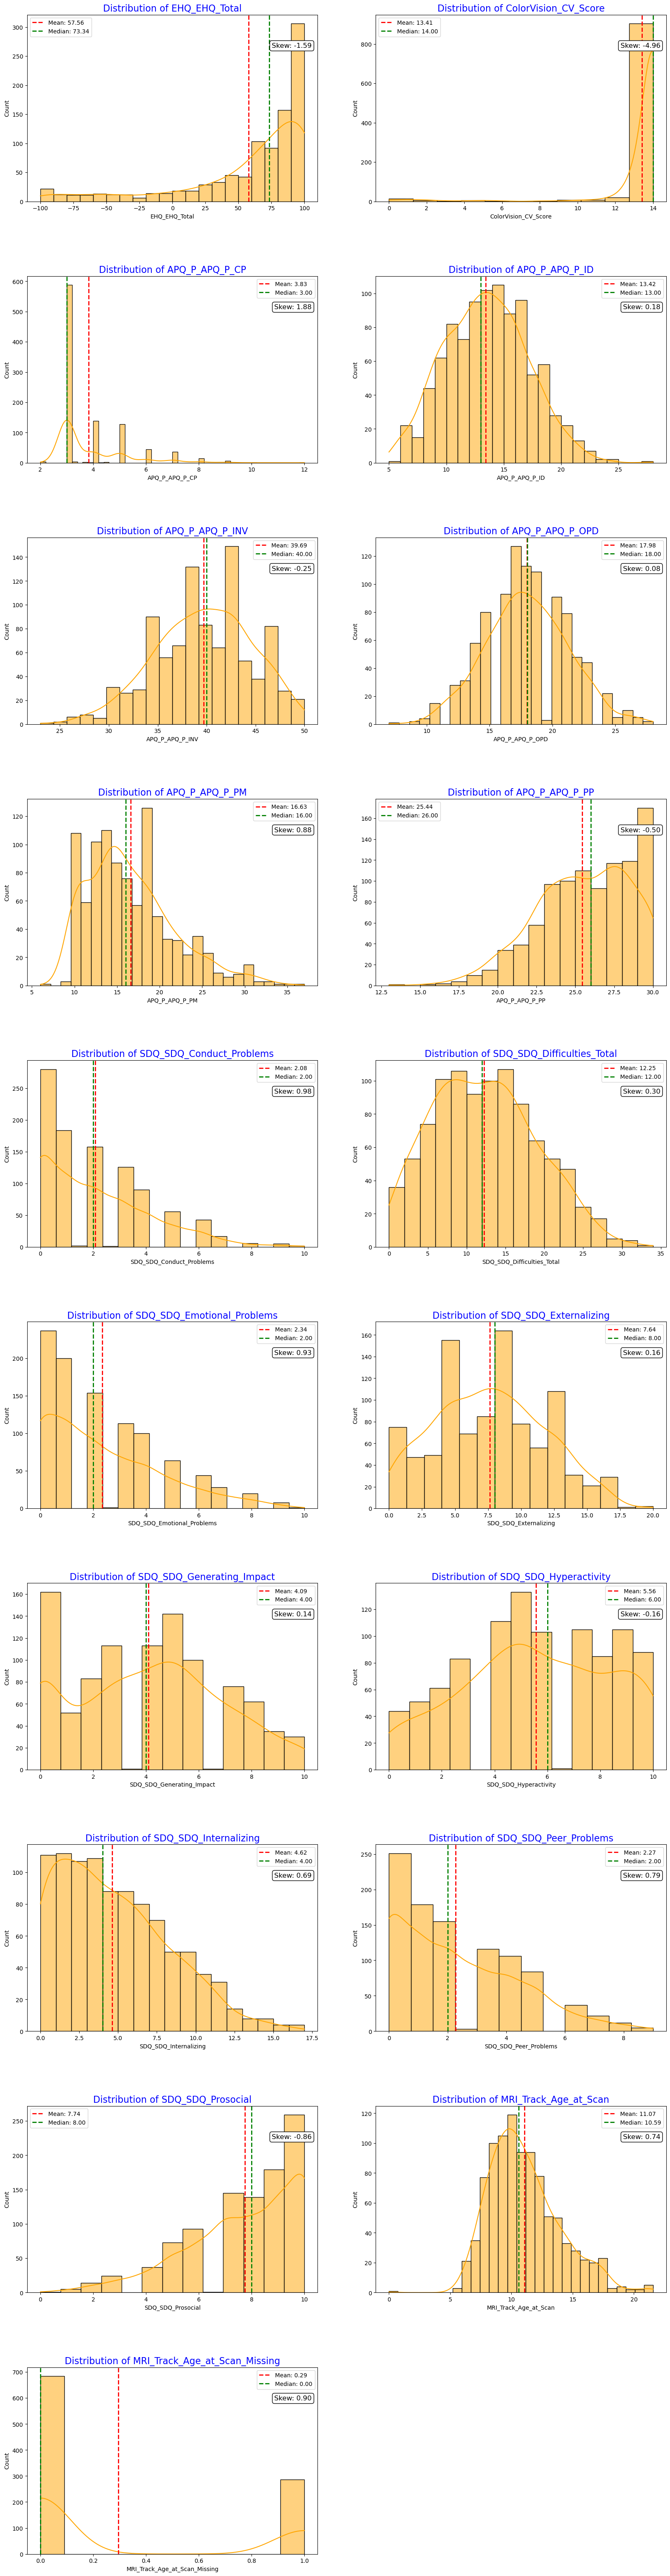

In [234]:
# Univariate analysis of all the numeric variables
plt.figure(figsize=(20,80))
for i, feature in enumerate(quant_cols,1):
    ax = plt.subplot(10,2,i)
    sns.histplot(data=X_train[feature],kde=True,color="orange", ax=ax)
    
    # Calculate skewness, mean, and median
    skewness = X_train[feature].skew()
    mean = X_train[feature].mean()
    median = X_train[feature].median()

# Add vertical lines for mean and median
    ax.axvline(mean, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean:.2f}")
    ax.axvline(median, color="green", linestyle="--", linewidth=2, label=f"Median: {median:.2f}")
    
    # Add skewness annotation
    ax.text(0.98, 0.85, f"Skew: {skewness:.2f}", transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
    
    #Set plot title and labels
    ax.set_title(f"Distribution of {feature}", fontsize=16, color="blue")
    ax.set_xlabel(feature)
    
    # Add legend
    ax.legend()
    
    # Adjust layout spacing
    plt.subplots_adjust(hspace=0.4)

plt.show()

## Univariate Analysis- Categorical

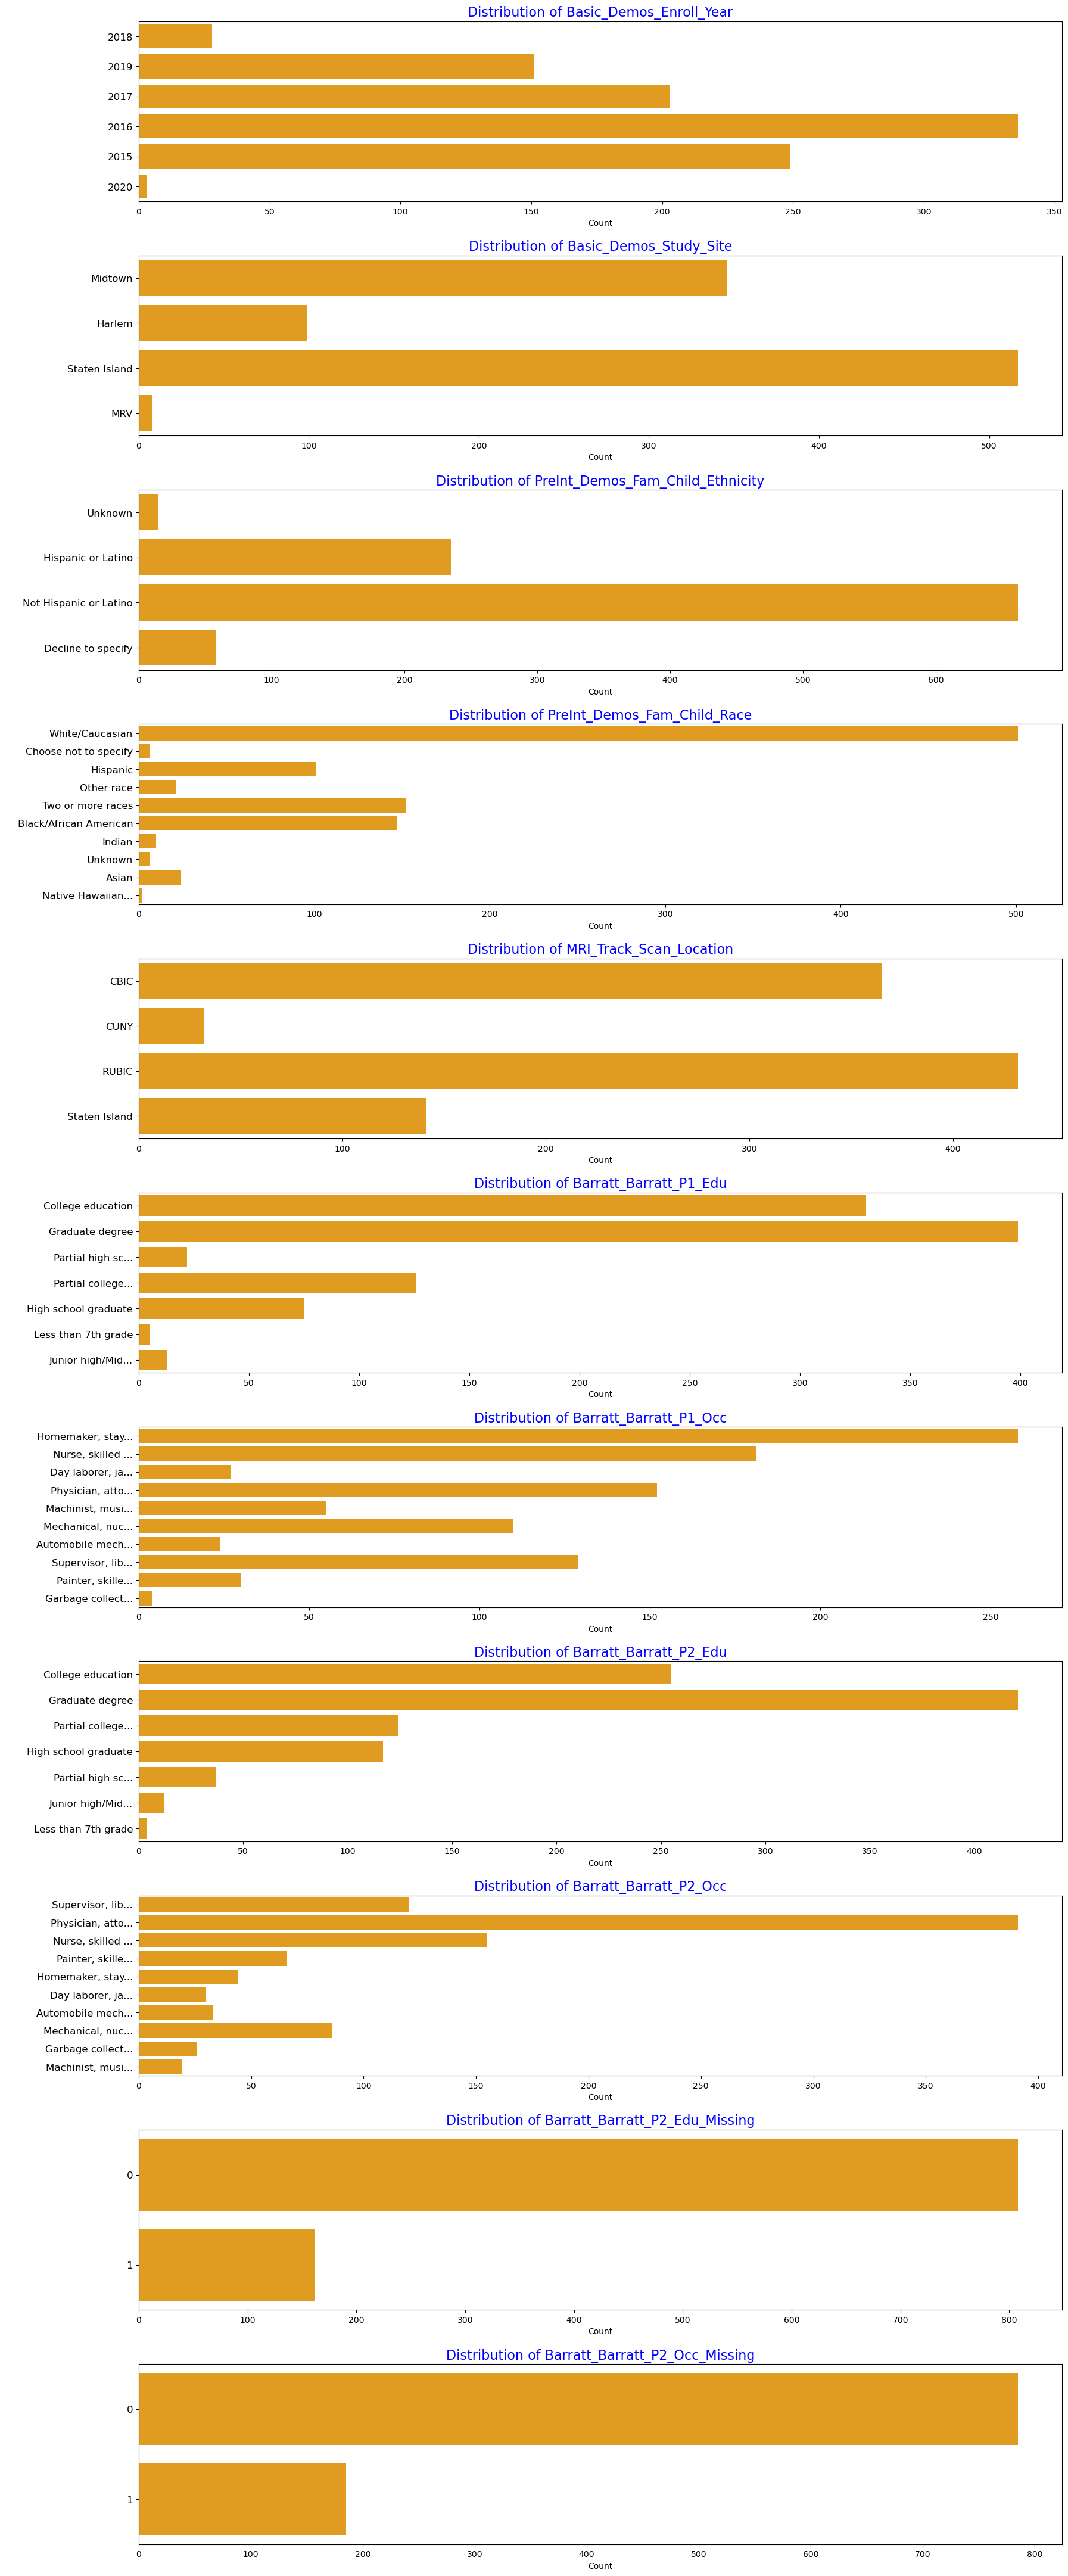

In [230]:
plt.figure(figsize=(20, len(categorical_columns) * 5))  # Dynamically adjust figure height
for i, feature in enumerate(categorical_columns, 1):
    ax = plt.subplot(len(categorical_columns), 1, i)
    
    # Extract unique classes within the feature
    unique_classes = X_train[feature].unique()
    
    # Truncate long class names
    truncated_classes = [str(cls)[:15] + '...' if len(str(cls)) > 30 else str(cls) for cls in unique_classes]
    
    # Plot countplot
    sns.countplot(data=X_train, y=feature, color="orange", ax=ax)
    
    # Explicitly set tick locations and labels
    tick_positions = range(len(unique_classes))  # Create tick positions for each class
    ax.set_yticks(tick_positions)  # Set the tick positions
    ax.set_yticklabels(truncated_classes, rotation=0, fontsize=12)  # Set the truncated labels

    # Set plot title
    ax.set_title(f"Distribution of {feature}", fontsize=16, color="blue")
    ax.set_xlabel("Count")
    ax.set_ylabel(" ")
    
    plt.subplots_adjust(hspace=0.3)  # Adjust spacing between plots

plt.show()

💡**Insight**

## Evaluating Multicolinearity- Bivariate Analysis-Quant data

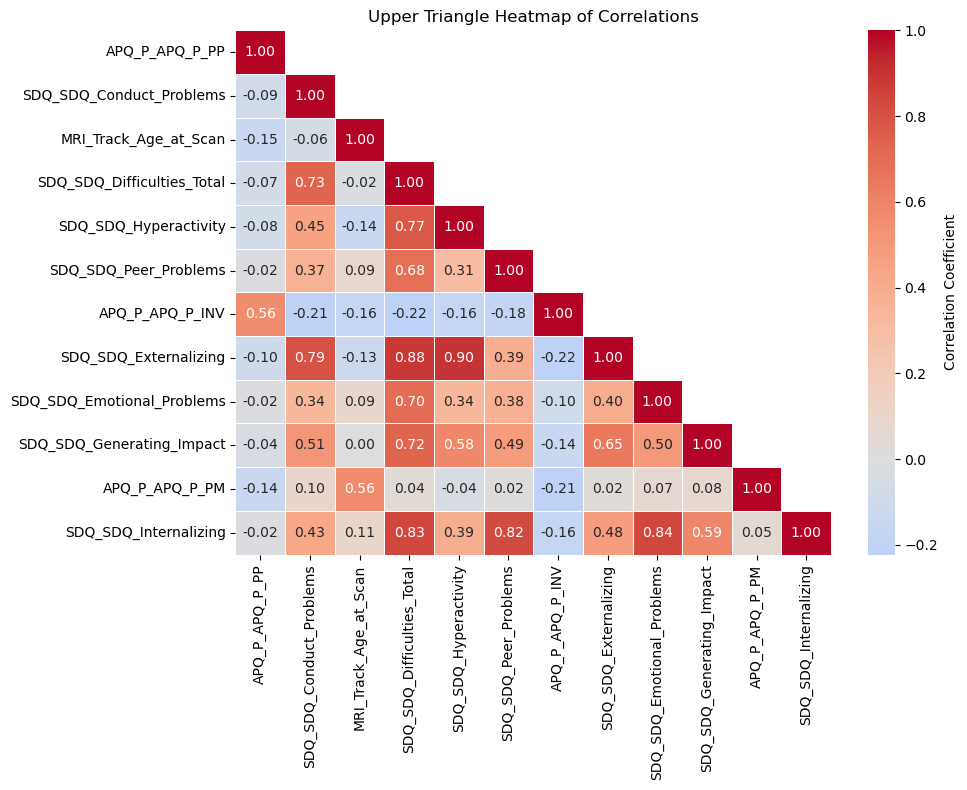

In [91]:
# Correlation matrix (computed on all quant_cols)
corr_matrix = X_train[quant_cols].corr()

# Extract high correlations (|r| > 0.5, including negative)
high_corr = []
for i in range(len(quant_cols)):
    for j in range(i + 1, len(quant_cols)):  # Upper triangle, exclude diagonal
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            sign = 'Positive' if corr > 0 else 'Negative'
            high_corr.append([quant_cols[i], quant_cols[j], corr, sign])

# Create DataFrame
high_corr = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Correlation', 'Sign'])

# Extract unique features from high_corr
unique_features = list(set(high_corr['Feature1']).union(set(high_corr['Feature2'])))

# Filter correlation matrix
filtered_corr_matrix = X_train[unique_features].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool), k=1)

# Upper triangle heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            mask=mask, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Upper Triangle Heatmap of Correlations')
plt.tight_layout()
plt.show()

💡flag_multicollinear = [ "SDQ_SDQ_EXTERNALIZING", "SDQ_SDQ_DIFFICULTIES_TOTAL", "SDQ_SDQ_INTERNALIZING" ]

## Multivariate Analysis- Quant Data

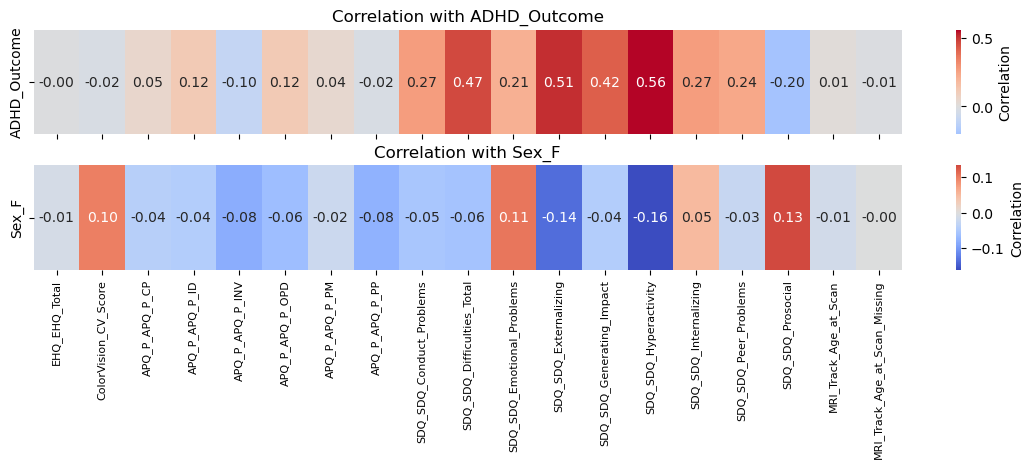

In [93]:
# Compute correlations with ADHD_Outcome and Sex_F
corr_adhd = X_train[quant_cols].corrwith(y_train['ADHD_Outcome']).to_frame(name='ADHD_Outcome').T
corr_sex = X_train[quant_cols].corrwith(y_train['Sex_F']).to_frame(name='Sex_F').T

# Create stacked heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# Heatmap for ADHD_Outcome
sns.heatmap(corr_adhd, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'},
            ax=ax1, xticklabels=quant_cols, yticklabels=['ADHD_Outcome'])
ax1.set_title('Correlation with ADHD_Outcome')
ax1.tick_params(axis='y', labelsize=10)

# Heatmap for Sex_F
sns.heatmap(corr_sex, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'},
            ax=ax2, xticklabels=quant_cols, yticklabels=['Sex_F'])
ax2.set_title('Correlation with Sex_F')
ax2.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', labelsize=8, rotation=90, labelbottom=True)

# Adjust layout
plt.subplots_adjust(bottom=0.4, hspace=0.3)
plt.show()

## Frequency encoding

In [275]:
obj_vars = [cols for cols in X_train if X[cols].dtype == 'object']
obj_vars

['Basic_Demos_Study_Site',
 'PreInt_Demos_Fam_Child_Ethnicity',
 'PreInt_Demos_Fam_Child_Race',
 'MRI_Track_Scan_Location',
 'Barratt_Barratt_P1_Edu',
 'Barratt_Barratt_P1_Occ',
 'Barratt_Barratt_P2_Edu',
 'Barratt_Barratt_P2_Occ']

In [245]:
def frequency_encode(df, col, train_freq=None):
    if train_freq is None:
        freq = df[col].value_counts(normalize=True)
    else:
        freq = train_freq
    mean_freq = freq.mean()
    df[col + '_freq'] = df[col].map(freq).fillna(mean_freq)
    return df, freq if train_freq is None else None

# Apply to train
X_train_freq = X_train.copy()
train_freqs = {}
for col in obj_vars:
    X_train_freq, freq = frequency_encode(X_train_freq, col)
    train_freqs[col] = freq
    X_train_freq = X_train_freq.drop(col, axis=1)

# Apply to validation
X_val_freq = X_test.copy()
val_freqs = {}
for col in obj_vars:
    X_val_freq, freq = frequency_encode(X_val_freq, col)
    val_freqs[col] = freq
    X_val_freq = X_val_freq.drop(col, axis=1)

# Apply to test
X_test_freq = Test_merged.copy()
for col in obj_vars:
    X_test_freq, _ = frequency_encode(X_test_freq, col, train_freq=train_freqs[col])
    X_test_freq = X_test_freq.drop(col, axis=1)

# Align test columns with train columns and fill missing values with column-specific means
X_test_freq = X_test_freq.reindex(columns=X_train_freq.columns, fill_value=0)
for col in X_test_freq.columns:
    if col.endswith('_freq'):
        X_test_freq[col] = X_test_freq[col].fillna(X_train_freq[col].mean())

# Handle missing values in train and test
X_train_freq = X_train_freq.fillna(X_train_freq.mean())
X_val_freq=X_val_freq.fillna(X_val_freq.mean())
X_test_freq = X_test_freq.fillna(X_train_freq.mean())

print("Train shape after encoding:", X_train_freq.shape)
print("Validation shape after encoding:", X_val_freq.shape)
print("Test shape after encoding:", X_test_freq.shape)

Train shape after encoding: (970, 19930)
Validation shape after encoding: (243, 19930)
Test shape after encoding: (304, 19930)


## Multivariate Analysis- Cat Data

In [263]:
X_train_freq['Basic_Demos_Study_Site']

KeyError: 'Basic_Demos_Study_Site'

In [249]:
# Compute correlations with ADHD_Outcome and Sex_F
corr_adhd = X_train_freq[categorical_columns].corrwith(y_train['ADHD_Outcome']).to_frame(name='ADHD_Outcome').T
corr_sex = X_train_freq[categorical_columns].corrwith(y_train['Sex_F']).to_frame(name='Sex_F').T

# Create stacked heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5), sharex=True)

# Heatmap for ADHD_Outcome
sns.heatmap(corr_adhd, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'},
            ax=ax1, xticklabels=quant_cols, yticklabels=['ADHD_Outcome'])
ax1.set_title('Correlation with ADHD_Outcome')
ax1.tick_params(axis='y', labelsize=10)

# Heatmap for Sex_F
sns.heatmap(corr_sex, annot=True, fmt='.2f', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'},
            ax=ax2, xticklabels=quant_cols, yticklabels=['Sex_F'])
ax2.set_title('Correlation with Sex_F')
ax2.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='x', labelsize=8, rotation=90, labelbottom=True)

# Adjust layout
plt.subplots_adjust(bottom=0.4, hspace=0.3)
plt.show()

KeyError: "['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'] not in index"

In [ ]:
### Evaluating Multicolinearity

### 3.5 One-hot encoding on categorical variable

8

In [52]:
# # Training Data
# X_train_encoded = pd.get_dummies(X, columns=obj_vars,drop_first=True, dtype=int)
# X_train_encoded.shape

In [53]:
# flag = [col for col in X_train_encoded if X_train_encoded[col].dtype == 'object']
# flag

In [54]:
# # Test Data
# X_test_encoded = pd.get_dummies(Test_merged, columns=obj_vars,drop_first=True, dtype=int)
# X_test_encoded.shape

In [55]:
# # Align test columns with train columns
# X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
# X_test_encoded.shape

## Correlation

In [167]:
# Correlation with Sex_F
corr_sex = X_train_freq.corrwith(y['Sex_F']).abs()

# Correlation with ADHD_outcome
corr_adhd = X_train_freq.corrwith(y['ADHD_Outcome']).abs()

# Combine into a DataFrame
corr_df = pd.DataFrame({'corr_sex': corr_sex, 'corr_adhd': corr_adhd})

# Keep features with correlation above a threshold (e.g., 0.1) for either target
threshold = 0.12
features_to_keep = corr_df[(corr_df['corr_sex'] >= threshold) | (corr_df['corr_adhd'] >= threshold)].index

# Subset the data
X_train_reduced = X_train_freq[features_to_keep]
X_test_reduced = X_test_freq[features_to_keep]

print("Reduced train shape:", X_train_reduced.shape)
print("Reduced test shape:", X_test_reduced.shape)


Reduced train shape: (1213, 103)
Reduced test shape: (304, 103)


### 3.7 Feature Scaling on numeric variable


In [61]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler = StandardScaler()

#fitting and transforming the train data points
X_train_scaled=scaler.fit_transform(X_train_reduced)

# # Transforming the test data points only
X_test_scaled=scaler.transform(X_test_reduced)

# Convert the NumPy array back to a pandas DataFrame
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train_reduced.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test_reduced.columns)

### 3.6 Sampling: SMOTE


In [171]:

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter
# Random OverSampling
#smt = RandomOverSampler(sampling_strategy = 1, random_state=45)
# SMOTE-
#smt = SMOTE(sampling_strategy = 'auto', random_state=45, k_neighbors=5)
# smt = SMOTE(sampling_strategy=0.8, random_state=45, k_neighbors=7)
# X_resampled, y_resampled = smt.fit_resample(X_train_encoded, y[['ADHD_Outcome', 'Sex_F']])
# SMOTETomek
#smt = SMOTETomek(random_state=45)

#------------------------------------------
# Custom multi-output SMOTE
def multioutput_smote(X, y, sampling_strategy='auto', random_state=45, k_neighbors=7):
    # Validate inputs
    if not all(col in y.columns for col in ['ADHD_Outcome', 'Sex_F']):
        raise ValueError("y must contain 'ADHD_Outcome' and 'Sex_F' columns")
    if not all(y[col].isin([0, 1]).all() for col in ['ADHD_Outcome', 'Sex_F']):
        raise ValueError("ADHD_Outcome and Sex_F must be binary (0 or 1)")
    
    # Convert X to NumPy array
    X = X.values if isinstance(X, pd.DataFrame) else X
    
    # Combine targets into joint labels
    y_joint = y['ADHD_Outcome'].astype(str) + '_' + y['Sex_F'].astype(str)
    class_counts = Counter(y_joint)
    
    # Check k_neighbors against minority class size
    min_count = min(class_counts.values())
    k_neighbors = min(k_neighbors, max(1, min_count - 1))  # Ensure k_neighbors is valid
    
    # Handle sampling strategy
    if sampling_strategy == 'auto':
        # 'auto' balances all classes to the majority class count
        max_count = max(class_counts.values())
        strategy = {k: max_count for k, v in class_counts.items()}
    else:
        # Float (e.g., 0.5) oversamples minorities to a fraction of majority
        max_count = max(class_counts.values())
        strategy = {k: max(v, int(max_count * sampling_strategy)) for k, v in class_counts.items()}
    
    # Apply SMOTE
    smt = SMOTE(sampling_strategy=strategy, random_state=random_state, k_neighbors=k_neighbors)
    X_res, y_joint_res = smt.fit_resample(X, y_joint)
    
    # Split back to original targets
    y_res = pd.DataFrame({
        'ADHD_Outcome': [int(x.split('_')[0]) for x in y_joint_res],
        'Sex_F': [int(x.split('_')[1]) for x in y_joint_res]
    })
    
    # Convert X_res to DataFrame with original columns
    X_res = pd.DataFrame(X_res, columns=X_train_scaled.columns if isinstance(X, np.ndarray) else X.columns)
    return X_res, y_res

# Resample
X_resampled, y_resampled = multioutput_smote(X_train_scaled, y[['ADHD_Outcome', 'Sex_F']], sampling_strategy='auto')
print("X_resampled shape:", X_resampled.shape)
print("y_resampled balance:\n", y_resampled.value_counts())


X_resampled shape: (2324, 103)
y_resampled balance:
 ADHD_Outcome  Sex_F
0             0        581
              1        581
1             0        581
              1        581
Name: count, dtype: int64


## <span style="color:Green"> 4.0 Model Building🛠️</span> 

In [155]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

## RFECV XGB

In [173]:
# # Define multi-output F1 scorer for RFECV
# def multioutput_f1_score(y_true, y_pred):
#     if isinstance(y_true, pd.DataFrame):
#         y_true = y_true.values
#     f1_adhd = f1_score(y_true[:, 0], y_pred[:, 0], zero_division=0)
#     f1_sex = f1_score(y_true[:, 1], y_pred[:, 1], zero_division=0)
#     return np.mean([f1_sex, f1_adhd])

# f1_scorer = make_scorer(multioutput_f1_score)

# # RFECV with XGBClassifier
# estimator = XGBClassifier(
#     n_estimators=75, max_depth=5, learning_rate=0.03, 
#     colsample_bytree=0.6, reg_lambda=150, scale_pos_weight=1.0, 
#     subsample=0.8, random_state=42, eval_metric='logloss'
# )
# rfecv = RFECV(
#     estimator=estimator, step=1, cv=5, scoring=f1_scorer, 
#     min_features_to_select=30, n_jobs=-1
# )
# rfecv.fit(X_resampled, y_resampled)
# print("RFECV features:", rfecv.n_features_)

# # Update final datasets
# X_train_final = X_resampled.iloc[:, rfecv.support_]
# X_test_final = X_test_scaled.iloc[:, rfecv.support_]
# print("Final train shape:", X_train_final.shape)
# print("Final test shape:", X_test_final.shape)


RFECV features: 94
Final train shape: (2324, 94)
Final test shape: (304, 94)


## RFECV Random Forest

In [193]:
# Optional: XGBoost version check (can be removed if not using XGBoost)
try:
    import xgboost
    print("XGBoost version:", xgboost.__version__)  # 3.0.0
except ImportError:
    print("XGBoost not imported, proceeding with Random Forest")

# Multi-output F1 scorer
def multioutput_f1_score(y_true, y_pred):
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values
    f1_adhd = f1_score(y_true[:, 0], y_pred[:, 0], zero_division=0)
    f1_sex = f1_score(y_true[:, 1], y_pred[:, 1], zero_division=0)
    return np.mean([f1_sex, f1_adhd])
f1_scorer = make_scorer(multioutput_f1_score)

# SMOTE function (only run if X_resampled, y_resampled not defined)
def multioutput_smote(X, y, sampling_strategy='auto', random_state=42):
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)
    X_resampled_list = []
    y_resampled_list = []
    for i in range(y.shape[1]):
        X_res, y_res = smote.fit_resample(X, y.iloc[:, i])
        X_resampled_list.append(X_res)
        y_resampled_list.append(y_res)
    X_resampled = X_resampled_list[0]
    y_resampled = pd.DataFrame({
        y.columns[0]: y_resampled_list[0],
        y.columns[1]: y_resampled_list[1]
    })
    return X_resampled, y_resampled

# Check for existing resampled data
try:
    print("Using existing X_resampled shape:", X_resampled.shape)
    print("Existing y_resampled balance:\n", y_resampled.value_counts())
except NameError:
    print("No existing X_resampled, y_resampled found. Running SMOTE...")
    X_resampled, y_resampled = multioutput_smote(X_train_scaled, y[['ADHD_Outcome', 'Sex_F']], sampling_strategy=0.5)
    print("X_resampled shape:", X_resampled.shape)
    print("y_resampled balance:\n", y_resampled.value_counts())

# RFECV with Random Forest
estimator = RandomForestClassifier(
    n_estimators=100, max_depth=5, min_samples_leaf=5,
    max_features='sqrt', random_state=42, n_jobs=-1
)
rfecv = RFECV(
    estimator=estimator, step=1, cv=5, scoring=f1_scorer,
    min_features_to_select=30, n_jobs=-1
)
rfecv.fit(X_resampled, y_resampled)
print("RFECV features:", rfecv.n_features_)
X_train_final = X_resampled.iloc[:, rfecv.support_]
X_test_final = X_test_scaled.iloc[:, rfecv.support_]

# RandomizedSearchCV for Random Forest
rf_adhd = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_sex = RandomForestClassifier(random_state=42, n_jobs=-1)
params_rf = {
    'n_estimators': [200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [3, 5, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]
}
grid_adhd = RandomizedSearchCV(
    estimator=rf_adhd, param_distributions=params_rf, n_iter=50, cv=5,
    scoring='f1', n_jobs=-1, verbose=1, random_state=42
)
grid_sex = RandomizedSearchCV(
    estimator=rf_sex, param_distributions=params_rf, n_iter=50, cv=5,
    scoring='f1', n_jobs=-1, verbose=1, random_state=42
)
grid_adhd.fit(X_train_final, y_resampled.iloc[:, 0])
grid_sex.fit(X_train_final, y_resampled.iloc[:, 1])
print("Best ADHD CV F1:", grid_adhd.best_score_)
print("Best ADHD Params:", grid_adhd.best_params_)
print("Best Sex_F CV F1:", grid_sex.best_score_)
print("Best Sex_F Params:", grid_sex.best_params_)

# Calibrate
best_adhd_cal = CalibratedClassifierCV(grid_adhd.best_estimator_, method='sigmoid', cv=5)
best_sex_cal = CalibratedClassifierCV(grid_sex.best_estimator_, method='sigmoid', cv=5)
best_adhd_cal.fit(X_train_final, y_resampled.iloc[:, 0])
best_sex_cal.fit(X_train_final, y_resampled.iloc[:, 1])

# Predict with 0.95/0.4
y_test_pred = np.column_stack([
    (best_adhd_cal.predict_proba(X_test_final)[:, 1] > 0.8).astype(int),
    (best_sex_cal.predict_proba(X_test_final)[:, 1] > 0.4).astype(int)
])
print("ADHD_Outcome (0/1):", np.bincount(y_test_pred[:, 0]))
print("Sex_F (0/1):", np.bincount(y_test_pred[:, 1]))


XGBoost version: 3.0.0
Using existing X_resampled shape: (2324, 103)
Existing y_resampled balance:
 ADHD_Outcome  Sex_F
0             0        581
              1        581
1             0        581
              1        581
Name: count, dtype: int64
RFECV features: 101
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best ADHD CV F1: 0.8569696967156448
Best ADHD Params: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 7}
Best Sex_F CV F1: 0.8471016228085109
Best Sex_F Params: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': 7}
ADHD_Outcome (0/1): [120 184]
Sex_F (0/1): [210  94]


In [68]:
# # RFE to select exactly 15 features
# rf_estimator = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth =20, min_samples_leaf=30)
# rfe = RFE(
#     estimator=rf_estimator,
#     n_features_to_select=15,
#     step=5
# )
# rfe.fit(X_train_reduced, y_train_resampled)
# selected_features = X_train_reduced.columns[rfe.support_]
# print("Selected features:", selected_features.tolist())

In [ ]:
# # Subset training and test data to the 30 features
# X_train_final = X_resampled.iloc[:, rfecv.support_]
# X_test_final = X_test_scaled.iloc[:, rfecv.support_]
# X_train_final.shape,X_test_final.shape

In [ ]:
# # GridSearchCV with same scorer

# # Classifier
# #classifier_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

# #--------------- Single classifier setup-------------------

# # xgb_adhd = XGBClassifier(random_state=42, eval_metric='logloss')
# # params_adhd = {
# #     'max_depth': [2, 3], 'learning_rate': [0.01, 0.03], 'n_estimators': [100, 150],
# #     'subsample': [0.6, 0.8], 'reg_lambda': [200, 300], 'colsample_bytree': [0.4, 0.6],
# #     'scale_pos_weight': [0.3, 0.5]
# # }
# # grid_adhd = GridSearchCV(estimator=xgb_adhd, param_grid=params_adhd, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# # grid_adhd.fit(X_train_final, y_resampled.iloc[:, 0])
# # print("Best ADHD CV F1:", grid_adhd.best_score_)

# #-------- Seperate classifier setup- XGB---------------------------



# # Define classifiers for ADHD_Outcome and Sex_F
# xgb_adhd = XGBClassifier(random_state=42, eval_metric='logloss')
# xgb_sex = XGBClassifier(random_state=42, eval_metric='logloss')

# # Parameter grids
# params_adhd = {
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.005, 0.01, 0.03, 0.05],
#     'n_estimators': [100, 150, 200],
#     'subsample': [0.6, 0.8, 1.0],
#     'reg_lambda': [100, 200, 300],
#     'colsample_bytree': [0.4, 0.6, 0.8],
#     'scale_pos_weight': [0.3, 0.5, 0.7],
#     'min_child_weight': [1, 3, 5]
# }
# params_sex = {
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.005, 0.01, 0.03, 0.05],
#     'n_estimators': [100, 150, 200],
#     'subsample': [0.6, 0.8, 1.0],
#     'reg_lambda': [50, 100, 200],
#     'colsample_bytree': [0.4, 0.6, 0.8],
#     'scale_pos_weight': [0.8, 1.0, 1.2],
#     'min_child_weight': [1, 3, 5]
# }

# # GridSearchCV for ADHD_Outcome
# grid_adhd = RandomizedSearchCV(
#     estimator=xgb_adhd, param_distributions=params_adhd, n_iter=50, cv=5,
#     scoring='f1', n_jobs=-1, verbose=1, random_state=42
# )
# grid_adhd.fit(X_train_final, y_resampled.iloc[:, 0])
# print("Best ADHD CV F1:", grid_adhd.best_score_)
# print("Best ADHD Params:", grid_adhd.best_params_)

# # GridSearchCV for Sex_F
# grid_sex = RandomizedSearchCV(
#     estimator=xgb_sex, param_distributions=params_sex, n_iter=50, cv=5,
#     scoring='f1', n_jobs=-1, verbose=1, random_state=42
# )
# grid_sex.fit(X_train_final, y_resampled.iloc[:, 1])
# print("Best Sex_F CV F1:", grid_sex.best_score_)
# print("Best Sex_F Params:", grid_sex.best_params_)

# # Calibrate classifiers
# best_adhd_cal = CalibratedClassifierCV(grid_adhd.best_estimator_, method='sigmoid', cv=5)
# best_sex_cal = CalibratedClassifierCV(grid_sex.best_estimator_, method='sigmoid', cv=5)
# best_adhd_cal.fit(X_train_final, y_resampled.iloc[:, 0])
# best_sex_cal.fit(X_train_final, y_resampled.iloc[:, 1])

# # Generate predictions with probability thresholds
# thresholds_adhd = [0.9]
# thresholds_sex = [0.4]
# best_pred = None
# best_thresholds = None
# for thresh_adhd in thresholds_adhd:
#     for thresh_sex in thresholds_sex:
#         y_test_pred = np.column_stack([
#             (best_adhd_cal.predict_proba(X_test_final)[:, 1] > thresh_adhd).astype(int),
#             (best_sex_cal.predict_proba(X_test_final)[:, 1] > thresh_sex).astype(int)
#         ])

# # Verify prediction counts
#         print(f"ADHD thresh={thresh_adhd}, Sex thresh={thresh_sex}")
#         print("ADHD_Outcome (0/1):", np.bincount(y_test_pred[:, 0]))
#         print("Sex_F (0/1):", np.bincount(y_test_pred[:, 1]))
        
#         temp_submission = pd.DataFrame({
#                     'participant_id': Test_merged['participant_id'],
#                     'ADHD_Outcome': y_test_pred[:, 0],
#                     'Sex_F': y_test_pred[:, 1]
#                 })
#         temp_submission.to_csv(f'submission_thresh_{thresh_adhd}_{thresh_sex}.csv', index=False)

# #------------------------------------RandomForest--------------
# #params = {
    
#     # 'max_depth': [3,5,7],
#     # 'min_samples_leaf': [3, 5, 8],
#     # 'max_features': [ 20,25,30, 33],
#     # 'n_estimators': [200, 300]


# # #GridSearchCV-RF
# # grid_search = GridSearchCV(
# #     estimator=classifier_rf,
# #     param_grid=params,
# #     cv=5,
# #     n_jobs=-1,  
# #     verbose=1,
# #     scoring=f1_scorer
# #)

# # #Fit-RF
# # grid_search.fit(X_train_final, y_train_resampled)

# # #Results-RF
# # print("Best Hyperparameters:", grid_search.best_params_)
# # print("Best Average F1 Score from CV:", grid_search.best_score_)
# #------------------------------------------



In [71]:
# Predict and submit-XGB_Sepearte Classider
# y_test_pred = np.column_stack([
#     grid_adhd.best_estimator_.predict(X_test_final),
#     grid_sex.best_estimator_.predict(X_test_final)])

In [72]:
#Strip 'estimator__' prefix from grid_search.best_params_
#rf_params = {key.replace('estimator__', ''): value for key, value in grid_search.best_params_.items()}
#xgb_params = {key.replace('estimator__', ''): value for key, value in grid_search.best_params_.items()}

# Final model
# # best_rf = MultiOutputClassifier(estimator=RandomForestClassifier(**rf_params, random_state=42))
# best_rf = MultiOutputClassifier(estimator=XGBClassifier(random_state=42, eval_metric='logloss',**xgb_params))
# best_rf.fit(X_train_final, y_train_resampled)

In [73]:
# y_train_pred = best_rf.predict(X_train_final)
# y_test_pred = best_rf.predict(X_test_final)

## Save to CSV-XGB

In [ ]:
# # Create submission
# submission = pd.DataFrame({
#     'participant_id': Test_merged['participant_id'],
#     'ADHD_Outcome': (best_adhd_cal.predict_proba(X_test_final)[:, 1] > 0.9).astype(int),
#     'Sex_F': (best_sex_cal.predict_proba(X_test_final)[:, 1] > 0.53).astype(int)
# })
# submission_file_path = "D:/IT/Kaggle/submission.csv"
# submission.to_csv(submission_file_path, index=False)

# # Verify
# print("Submission head:\n", submission.head(-1))
# print("Submission rows:", len(submission))

## Save to CSV-RF

In [203]:
# Create submission
submission = pd.DataFrame({
    'participant_id': Test_merged['participant_id'],
    'ADHD_Outcome': y_test_pred[:, 0],
    'Sex_F': y_test_pred[:, 1]
})
submission_file_path = "D:/IT/Kaggle/submission.csv"
submission.to_csv(submission_file_path, index=False)

# Verify
print("Submission head:\n", submission.head(-1))
print("Submission rows:", len(submission))

Submission head:
     participant_id  ADHD_Outcome  Sex_F
0     Cfwaf5FX7jWK             1      0
1     vhGrzmvA3Hjq             0      0
2     ULliyEXjy4OV             1      0
3     LZfeAb1xMtql             1      0
4     EnFOUv0YK1RG             1      0
..             ...           ...    ...
298   ZrhtdcUFpSDs             0      0
299   UadZfjdEg7eG             1      0
300   IUEHiLmQAqCi             1      0
301   cRySmCadYFRO             0      1
302   E3MvDUtJadc5             1      0

[303 rows x 3 columns]
Submission rows: 304
